In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("Finance Loan approval_train.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [3]:
df = df.drop('Credit_History', axis=1)

In [4]:
df = df.dropna(subset=['Gender', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term'])


In [5]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

<Axes: >

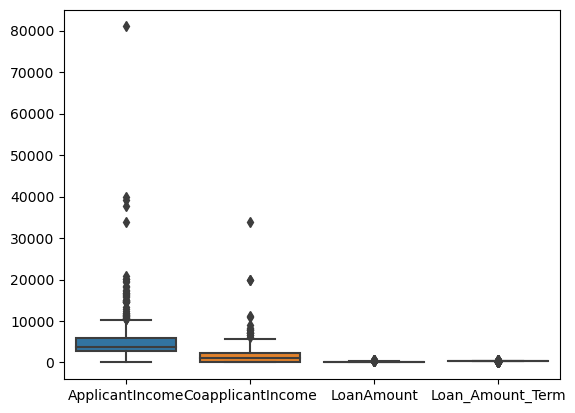

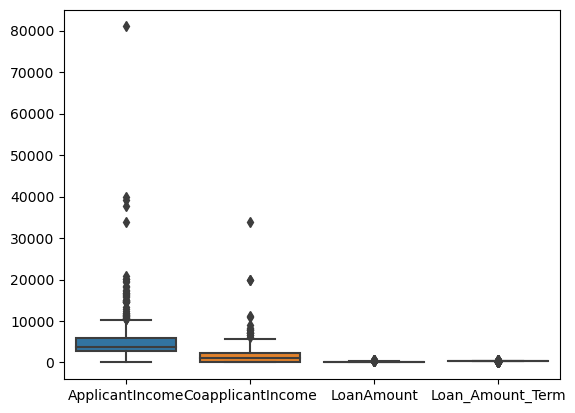

In [6]:
sns.boxplot(df)

In [7]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Property_Area         object
Loan_Status           object
dtype: object

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
def remove_iqr_outliers(df, col1):
  q1 = df[col1].quantile(0.25)
  q3 = df[col1].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  return df.loc[(df[col1] >= lower_bound) & (df[col1] <= upper_bound)]

df = remove_iqr_outliers(df, 'ApplicantIncome')
df= remove_iqr_outliers(df, 'CoapplicantIncome')

In [9]:
df=df.drop('Loan_ID',axis=1)

In [10]:
cat_cols = df.select_dtypes(include='object')
cat_cols

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
5,Male,Yes,2,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [11]:
for i in cat_cols:
    print(df[i].value_counts())

Male      379
Female     86
Name: Gender, dtype: int64
Yes    303
No     162
Name: Married, dtype: int64
0     272
2      81
1      75
3+     37
Name: Dependents, dtype: int64
Graduate        358
Not Graduate    107
Name: Education, dtype: int64
No     411
Yes     54
Name: Self_Employed, dtype: int64
Semiurban    183
Urban        142
Rural        140
Name: Property_Area, dtype: int64
Y    331
N    134
Name: Loan_Status, dtype: int64
Male      379
Female     86
Name: Gender, dtype: int64
Yes    303
No     162
Name: Married, dtype: int64
0     272
2      81
1      75
3+     37
Name: Dependents, dtype: int64
Graduate        358
Not Graduate    107
Name: Education, dtype: int64
No     411
Yes     54
Name: Self_Employed, dtype: int64
Semiurban    183
Urban        142
Rural        140
Name: Property_Area, dtype: int64
Y    331
N    134
Name: Loan_Status, dtype: int64


In [12]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in cat_cols:
    df[i]=encoder.fit_transform(df[i])
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,2,1


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,2,1


In [13]:
X = df.drop(columns='Loan_Status',axis=1)
Y = df['Loan_Status']

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=101)
model = RandomForestClassifier()
model.fit(X_train,Y_train)
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0])

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0])

In [15]:
print(metrics.accuracy_score(Y_test,y_pred))

0.7419354838709677
0.7419354838709677


In [16]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,2


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area
1,1,1,1,0,0,4583,1508.0,128.0,360.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,2
3,1,1,0,1,0,2583,2358.0,120.0,360.0,2
4,1,0,0,0,0,6000,0.0,141.0,360.0,2
5,1,1,2,0,1,5417,4196.0,267.0,360.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,0
610,1,1,3,0,0,4106,0.0,40.0,180.0,0
611,1,1,1,0,0,8072,240.0,253.0,360.0,2
612,1,1,2,0,0,7583,0.0,187.0,360.0,2


In [17]:
input_data = (1,1,0,0,1,6522,2312,250,180,1)
input_data_array = np.asarray(input_data)

input_data_reshaped = input_data_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print('Predicted Loan Status : ',str(prediction))

Predicted Loan Status :  [1]
Predicted Loan Status :  [1]


C:\Users\kshit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\kshit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [18]:
import numpy as np

category_mapping = {
    "Gender": {"male": 1, "female": 0}, 
    "Married": {"yes": 1, "no": 0},
    "Dependents": {"0": 0, "1": 1,"2":2,"3+":3},
    "Education": {"graduate": 0, "not graduate": 0},
    "Self_Employed": {"no": 0, "yes": 1},
    "Property_Area": {"semiurban": 0, "urban": 1, "rural":2},  
}

def preprocess_text_input(text_data):
    numerical_data = []
    keys = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]
    for key, value in zip(keys, text_data):
        if value in category_mapping.get(key, {}):  
            numerical_data.append(category_mapping[key][value])
        else:
            numerical_data.append(0)  
    return np.asarray(numerical_data)

text_input = []
text_input.append(input("Enter your gender (male/female): "))
text_input.append(input("Enter your marriage status (yes/no): "))
text_input.append(input("Do you have dependents (0/1/2/3+): "))
text_input.append(input("Enter your education (graduate/not graduate): "))
text_input.append(input("Are you self-employed (yes/no): "))
text_input.append(input("Enter your property area status (semiurban/urban/rural): "))

preprocessed_text_input = preprocess_text_input(text_input)

numerical_data = []
numerical_data.append(float(input("Enter your ApplicantIncome: "))) 
numerical_data.append(float(input("Enter your CoapplicantIncome: ")))  
numerical_data.append(float(input("Enter your Loan amount: ")))  
numerical_data.append(float(input("Enter your Loan amount term: ")))  

combined_data = np.concatenate((
    preprocessed_text_input[:5],  # Gender, Married, Dependents, Education, Self_Employed
    np.array(numerical_data),     # ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term
    preprocessed_text_input[5:]   # Property_Area
))

input_data = combined_data.reshape(1, -1)

prediction = model.predict(input_data)

if prediction == 1:
    print('Predicted Loan Status: Yes')
else:
    print('Predicted Loan Status: No')

Enter your gender (male/female): male
Enter your marriage status (yes/no): yes
Do you have dependents (0/1/2/3+): 1
Enter your education (graduate/not graduate): graduate
Are you self-employed (yes/no): no
Enter your property area status (semiurban/urban/rural): semiurban
Enter your ApplicantIncome: 3455
Enter your CoapplicantIncome: 1232
Enter your Loan amount: 234
Enter your Loan amount term: 12
Predicted Loan Status: Yes
Predicted Loan Status: Yes


C:\Users\kshit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\kshit\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [19]:
import pickle

filename = 'loan status prediction.sav'
pickle.dump(model, open(filename,'wb')) 